### **DATA ANALYSIS PYTHON PROJECT - BLIKIT ANALYSIS**

### Import libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Read Data 

In [7]:
df = pd.read_csv(r'E:\project\Projects\Blinkit Project\dataset\BlinkIT Grocery Data.csv')

### Styling for plots

In [8]:
sns.set(style="whitegrid", palette="muted")
%matplotlib inline

### Inspect data

In [9]:
df.head(), df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item Fat Content           8523 non-null   object 
 1   Item Identifier            8523 non-null   object 
 2   Item Type                  8523 non-null   object 
 3   Outlet Establishment Year  8523 non-null   int64  
 4   Outlet Identifier          8523 non-null   object 
 5   Outlet Location Type       8523 non-null   object 
 6   Outlet Size                8523 non-null   object 
 7   Outlet Type                8523 non-null   object 
 8   Item Visibility            8523 non-null   float64
 9   Item Weight                7060 non-null   float64
 10  Sales                      8523 non-null   float64
 11  Rating                     8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


(  Item Fat Content Item Identifier              Item Type  \
 0          Regular           FDX32  Fruits and Vegetables   
 1          Low Fat           NCB42     Health and Hygiene   
 2          Regular           FDR28           Frozen Foods   
 3          Regular           FDL50                 Canned   
 4          Low Fat           DRI25            Soft Drinks   
 
    Outlet Establishment Year Outlet Identifier Outlet Location Type  \
 0                       2012            OUT049               Tier 1   
 1                       2022            OUT018               Tier 3   
 2                       2016            OUT046               Tier 1   
 3                       2014            OUT013               Tier 3   
 4                       2015            OUT045               Tier 2   
 
   Outlet Size        Outlet Type  Item Visibility  Item Weight     Sales  \
 0      Medium  Supermarket Type1         0.100014        15.10  145.4786   
 1      Medium  Supermarket Type2     

### Data validation

In [10]:
Item_Fat_Content = df['Item Fat Content'].unique()
Item_Fat_Content

array(['Regular', 'Low Fat', 'low fat', 'LF', 'reg'], dtype=object)

### Clean data

In [11]:
# 📌 3. Clean column names
df.columns = df.columns.str.strip().str.replace(" ", "_")
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(
    {'LF': 'Low Fat', 
     'low fat': 'Low Fat',
     'reg': 'Regular'})


### Data re validation

In [12]:
Item_Fat_Content = df['Item_Fat_Content'].unique()
Item_Fat_Content

array(['Regular', 'Low Fat'], dtype=object)

### Preprocess: calculate TotalSales and basic metrics

In [13]:
metrics = {
    "total_sales": df["Sales"].sum(),
    "avg_sales": df["Sales"].mean(),
    "num_items": df["Sales"].count(),
    "avg_rating": df["Rating"].mean()
}
print("📊 Key Metrics:")
metrics

📊 Key Metrics:


{'total_sales': 1201681.4928,
 'avg_sales': 140.99278338613163,
 'num_items': 8523,
 'avg_rating': 3.965857092573038}

### **BUSINESS REQUIREMENTS**

### KPI's REQUIREMENTS

In [14]:
print(f"Total Sales: ₹{metrics['total_sales']/100000:.2f} Lakhs")
print(f"Average Sales: ₹{metrics['avg_sales']:.2f}") 
print(f"Number of Unique Items: {metrics['num_items']}")
print(f"Average Rating: {metrics['avg_rating']:.2f}")

Total Sales: ₹12.02 Lakhs
Average Sales: ₹140.99
Number of Unique Items: 8523
Average Rating: 3.97


### CHARTS REQUIREMENTS

#### Total Sales by fat content

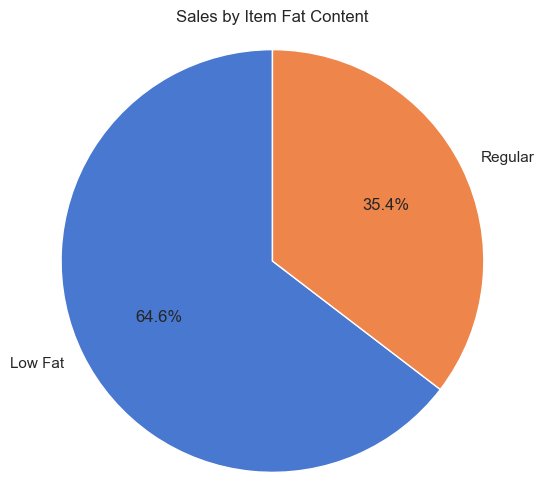

In [15]:
# Group data
sales_by_fat = df.groupby('Item_Fat_Content').agg({"Sales": "sum"}).reset_index()

# Pie chart
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(
    sales_by_fat["Sales"],
    labels=sales_by_fat['Item_Fat_Content'],
    autopct='%1.1f%%',
    startangle=90,
)
ax.set_title("Sales by Item Fat Content")
ax.axis('equal')  # Equal aspect ratio ensures pie is drawn as a circle
plt.show()

#### Total Sales by Item Type (Grouped by fat content)

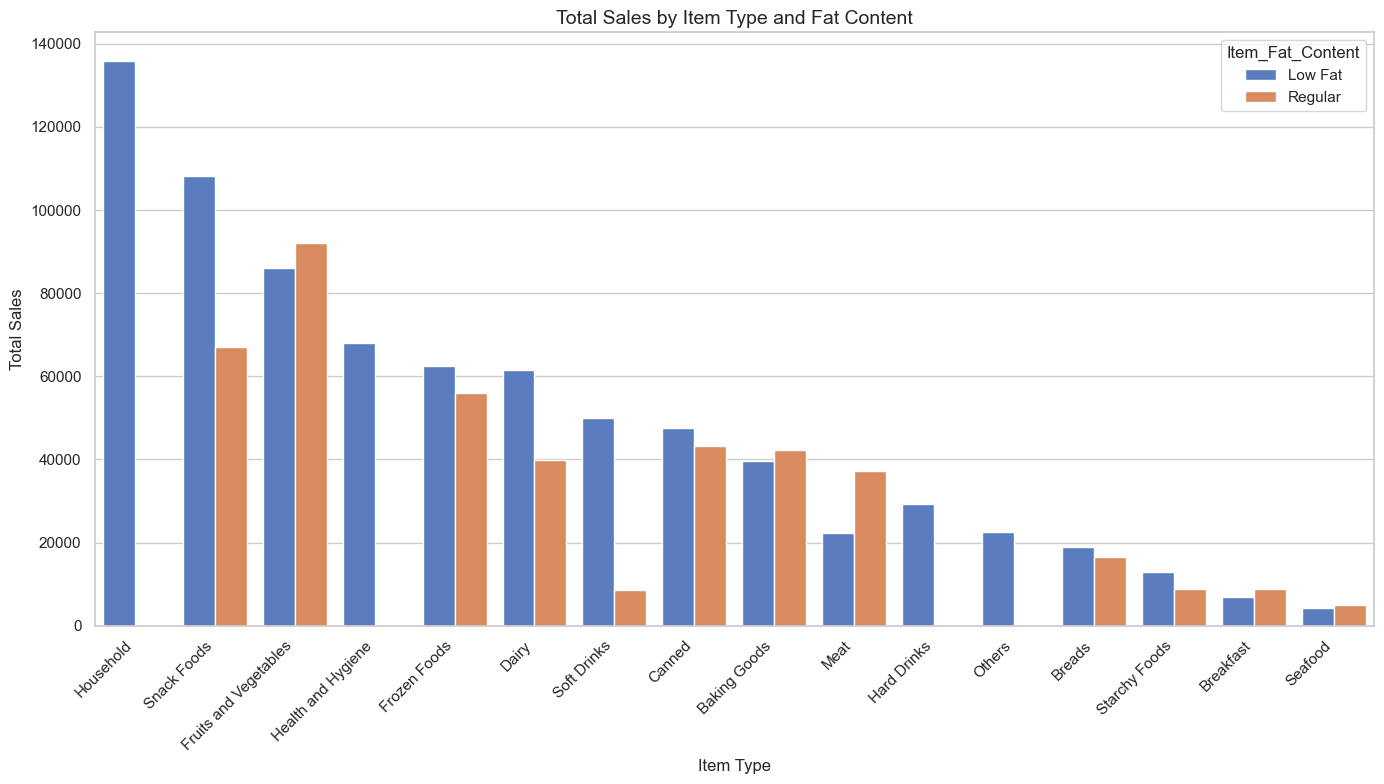

In [20]:
# Group by Item Type and Fat Content, then aggregate total sales
grouped_data = df.groupby(['Item_Type', 'Item_Fat_Content'])['Sales'].sum().reset_index()

# Sort by Sales in descending order
grouped_data = grouped_data.sort_values(by='Sales', ascending=False)

# Set plot style
plt.figure(figsize=(14, 8))
sns.barplot(data=grouped_data, x='Item_Type', y='Sales', hue='Item_Fat_Content')

# Set labels and title
plt.xlabel("Item Type", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.title("Total Sales by Item Type and Fat Content", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

#### Fat content by outlet of total sales

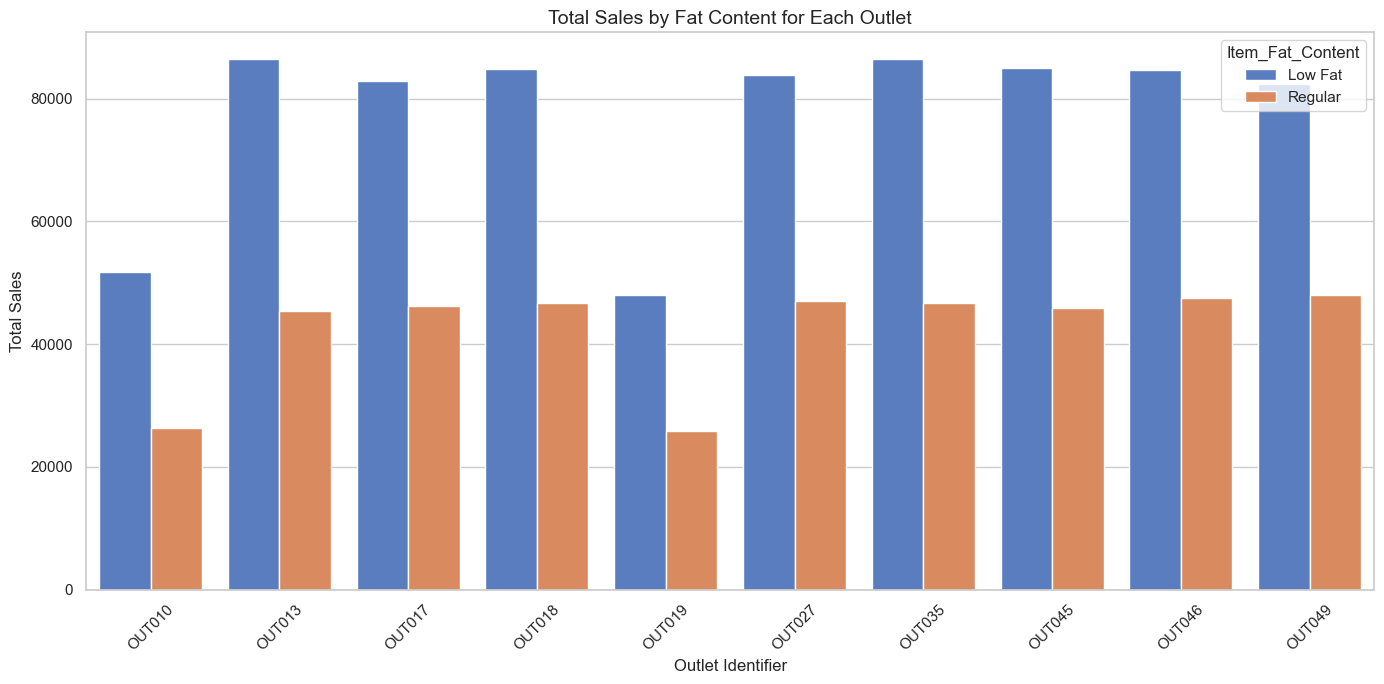

In [22]:
# Group data by Outlet and Fat Content, then sum Sales
grouped_data = df.groupby(['Outlet_Identifier', 'Item_Fat_Content'])['Sales'].sum().reset_index()

# Set plot style
plt.figure(figsize=(14, 7))
sns.barplot(data=grouped_data, x='Outlet_Identifier', y='Sales', hue='Item_Fat_Content')

# Add titles and labels
plt.title("Total Sales by Fat Content for Each Outlet", fontsize=14)
plt.xlabel("Outlet Identifier", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


#### Fat content by outlet location type of total sales

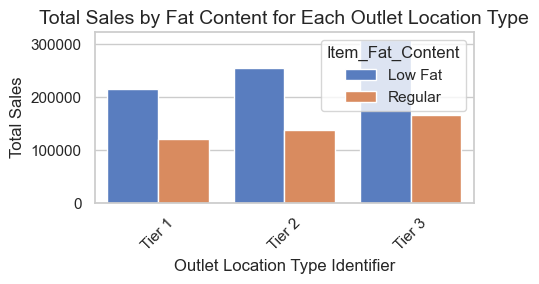

In [32]:
# Group data by Outlet and Fat Content, then sum Sales
grouped_data = df.groupby(['Outlet_Location_Type', 'Item_Fat_Content'])['Sales'].sum().reset_index()

# Set plot style
plt.figure(figsize=(5, 3))
sns.barplot(data=grouped_data, x='Outlet_Location_Type', y='Sales', hue='Item_Fat_Content')

# Add titles and labels
plt.title("Total Sales by Fat Content for Each Outlet Location Type", fontsize=14)
plt.xlabel("Outlet Location Type Identifier", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

#### Total sales by outlet establishmet year

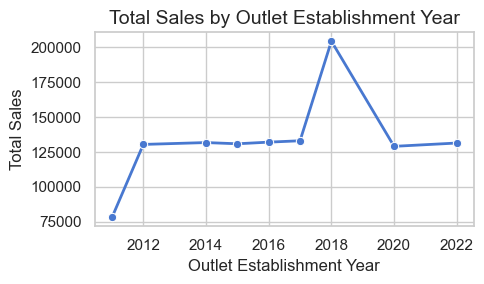

In [31]:
# Grouping data by 'Outlet Establishment Year' and calculating total sales
line_data = df.groupby('Outlet_Establishment_Year')['Sales'].sum().reset_index()

# Sort by year to ensure proper line plotting
line_data = line_data.sort_values('Outlet_Establishment_Year')

# Set plot size and style
plt.figure(figsize=(5, 3))
sns.lineplot(data=line_data, x='Outlet_Establishment_Year', y='Sales', marker='o', linewidth=2)

# Add titles and labels
plt.title("Total Sales by Outlet Establishment Year", fontsize=14)
plt.xlabel("Outlet Establishment Year", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()


#### Total sales by outlet size

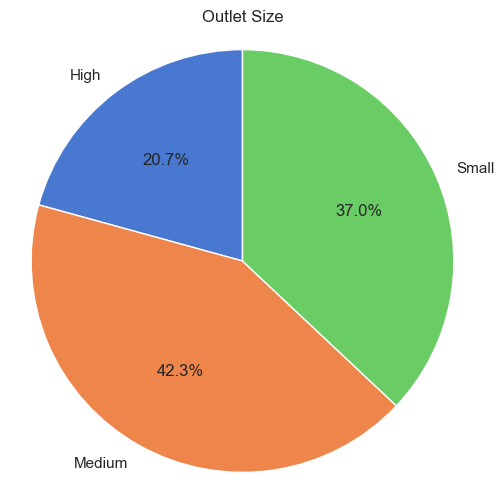

In [28]:
# Group data
sales_by_Outlet_size = df.groupby('Outlet_Size').agg({"Sales": "sum"}).reset_index()

# Pie chart
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(
    sales_by_Outlet_size["Sales"],
    labels=sales_by_Outlet_size['Outlet_Size'],
    autopct='%1.1f%%',
    startangle=90,
)
ax.set_title("Outlet Size")
ax.axis('equal')  # Equal aspect ratio ensures pie is drawn as a circle
plt.show()

#### Total sales by outlet location type

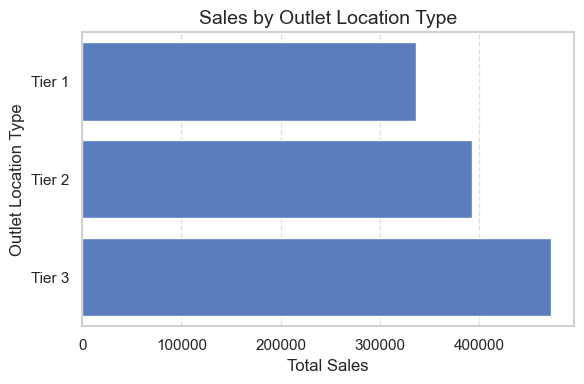

In [30]:
# Group and sort
location_sales = df.groupby('Outlet_Location_Type')['Sales'].sum().reset_index()
location_sales = location_sales.sort_values('Sales', ascending=True)

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(
    data=location_sales,
    x='Sales',
    y='Outlet_Location_Type',
)

# Style and labels
plt.title('Sales by Outlet Location Type', fontsize=14)
plt.xlabel('Total Sales')
plt.ylabel('Outlet Location Type')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
